In [1]:
#References:
#https://deeplearningsandbox.com/how-to-build-an-image-recognition-system-using-keras-and-tensorflow-for-a-1000-everyday-object-559856e04699

In [2]:
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.


In [3]:
model = ResNet50(weights='imagenet')

In [4]:
def predict(model, img, target_size, top_n=3):
    if img.size!=target_size:
        img=img.resize(target_size)
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    x=preprocess_input(x)
    preds=model.predict(x)
    return decode_predictions(preds, top=top_n)[0]

In [5]:
def plot_preds(image, preds):
    plt.imshow(image)
    plt.axis('off')
    
    plt.figure()
    order=list(reversed(range(len(preds))))
    bar_preds=[pr[2] for pr in preds]
    labels=(pr[1] for pr in preds)
    for i in preds:
        print(i[0],i[1],i[2])
    plt.barh(order, bar_preds, alpha=0.5)
    plt.yticks(order,labels)
    plt.xlabel('Probability')
    #plt.xlabel(0, 1)
    plt.tight_layout()
    plt.show()

n03100240 convertible 0.387895
n04285008 sports_car 0.378995
n03459775 grille 0.154239


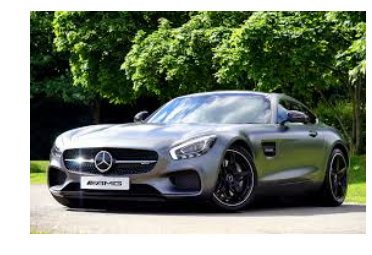

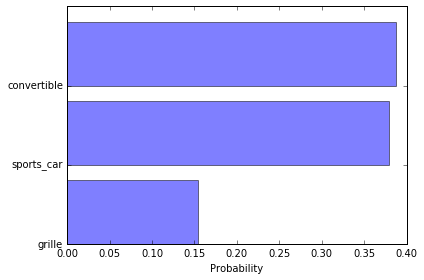

In [6]:
path='Images/1.jpeg'
img=Image.open(path)
target_size=(224,224)
plot_preds(img,predict(model,img,target_size))